In [14]:
from projet_etu import *
import matplotlib.pyplot as plt
import numpy as np
from utils.mltools import *
import pickle as pkl 
from sklearn.manifold import TSNE

### USPS dataset

In [15]:
data = pkl.load(open("data/usps.pkl",'rb')) 
X = data["X_train"]
y = data["Y_train"]

X = (X - X.min(axis=1, keepdims=True)) / (X.max(axis=1, keepdims=True) - X.min(axis=1, keepdims=True))

X_test = data["X_test"]

X_test = (X_test - X_test.min(axis=1, keepdims=True)) / (X_test.max(axis=1, keepdims=True) - X_test.min(axis=1, keepdims=True))

y_test = data["Y_test"]

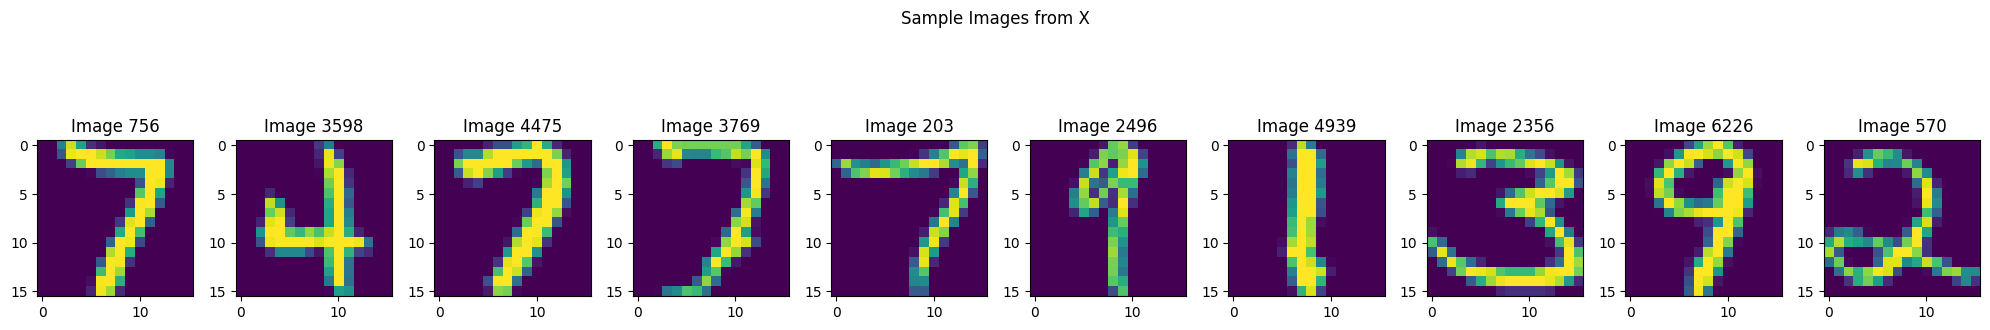

In [16]:
n = 10
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20, 4))

for ax in axes.flatten():
    i = np.random.randint(len(X))
    ax.imshow(X[i].reshape(16, 16))
    ax.set_title(f"Image {i+1}")

fig.suptitle("Sample Images from X")
plt.tight_layout()
plt.show()

In [17]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

y_one_hot = one_hot_y(y, classes)

  0%|          | 0/100 [00:00<?, ?it/s]

Training completed.


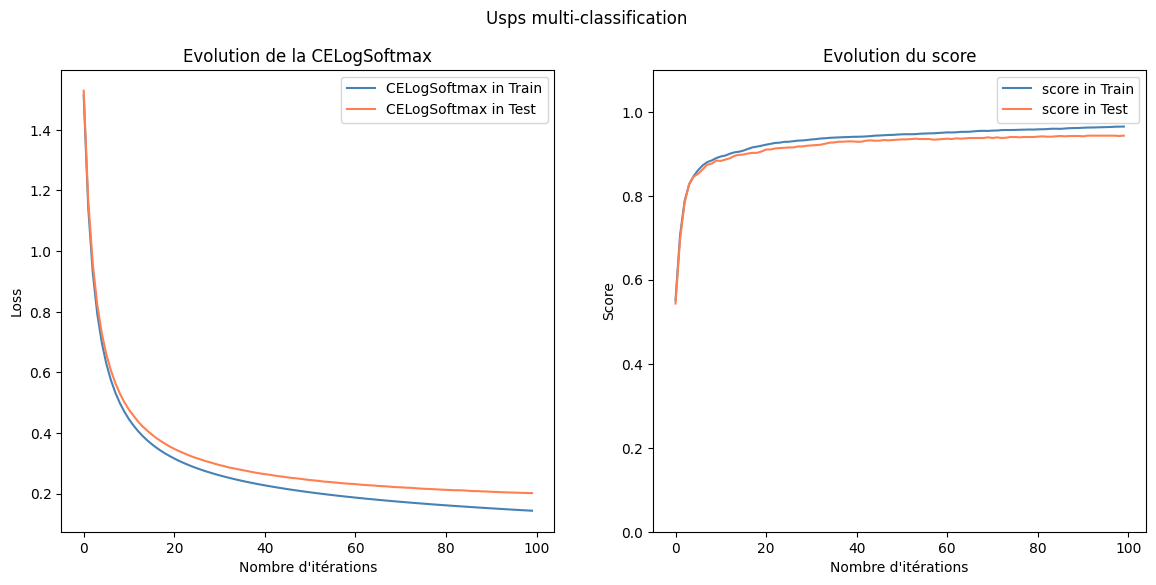

In [18]:
hidden_neurons_1 = 150
hidden_neurons_2 = 60

net = Sequential([
    Linear(input_neurons, hidden_neurons_1, bias=True, type="xavier"),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True, type="xavier"),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True, type="xavier"),
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-4)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=10, epochs=100, verbose=False)

plot_net(optim, X, y_one_hot, net_type="multiclass", net_title="Usps multi-classification")

In [19]:
net_to_graph(net, horizontal=True, net_name='usps_multiclass')
net.score(X_test, y_test)

0.9367872271098078

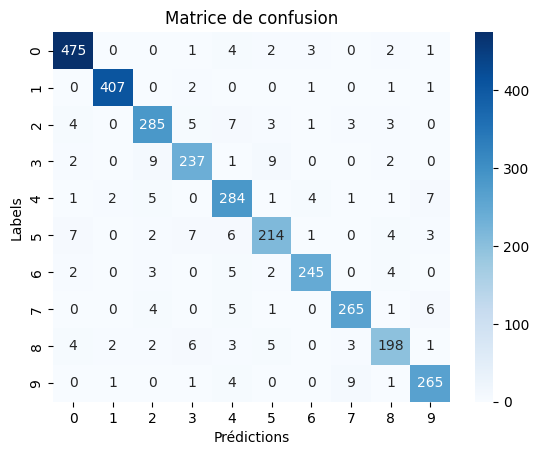

\begin{tabular}{lrllr}
\toprule
 & precision & recall & f1-score & support \\
class &  &  &  &  \\
\midrule
0 & 0.96 & 0.97 & 0.97 & 488 \\
1 & 0.99 & 0.99 & 0.99 & 412 \\
2 & 0.92 & 0.92 & 0.92 & 311 \\
3 & 0.92 & 0.91 & 0.91 & 260 \\
4 & 0.89 & 0.93 & 0.91 & 306 \\
5 & 0.90 & 0.88 & 0.89 & 244 \\
6 & 0.96 & 0.94 & 0.95 & 261 \\
7 & 0.94 & 0.94 & 0.94 & 282 \\
8 & 0.91 & 0.88 & 0.90 & 224 \\
9 & 0.93 & 0.94 & 0.94 & 281 \\
accuracy & 0.94 &  &  & 3069 \\
\bottomrule
\end{tabular}



In [21]:
yhat = net.predict(X_test)
yhat = yhat.reshape(-1)
df = classification_report(y_test, yhat, [f"{i}" for i in range(classes)])
print(df.to_latex(float_format="{:.2f}".format))

In [22]:
print(yhat.shape)

(3069,)


/Users/tian/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


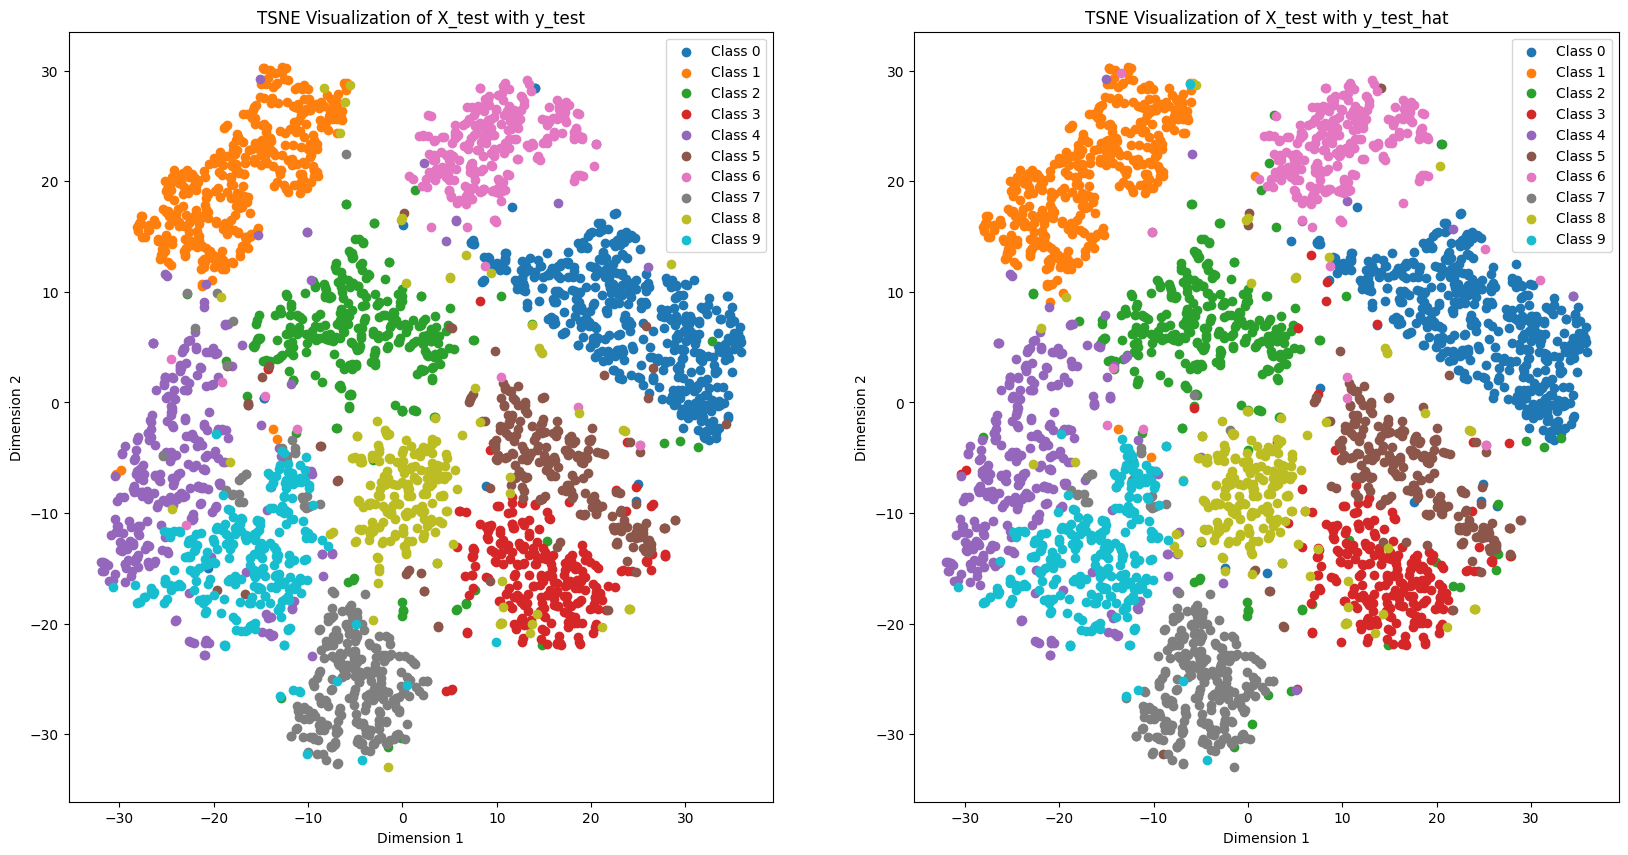

In [9]:
aff = TSNE(n_components=2, random_state=0, init="pca", n_iter=500, verbose=0)
sign_aff = aff.fit_transform(X_test)

colors = {i: plt.cm.tab10(i) for i in range(classes)}

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].set_title("TSNE Visualization of X_test with y_test")

for cl in range(classes):
    axs[0].scatter(sign_aff[y_test == cl][:, 0], sign_aff[y_test == cl][:, 1], color=colors[cl], label=f"Class {cl}")
    
axs[0].set_xlabel("Dimension 1")
axs[0].set_ylabel("Dimension 2")
axs[0].legend()

y_test_hat = net.predict(X_test).reshape(-1)

axs[1].set_title("TSNE Visualization of X_test with y_test_hat")
for cl in range(classes):
    axs[1].scatter(sign_aff[y_test_hat == cl][:, 0], sign_aff[y_test_hat == cl][:, 1], color=colors[cl], label=f"Class {cl}")
    
axs[1].set_xlabel("Dimension 1")
axs[1].set_ylabel("Dimension 2")
axs[1].legend()

plt.show()


## Another test (mnist dataset)

  0%|          | 0/50 [00:00<?, ?it/s]

Training completed.
Précision sur l'ensemble d'entraînement : 0.9696
Précision sur l'ensemble de test : 0.9300


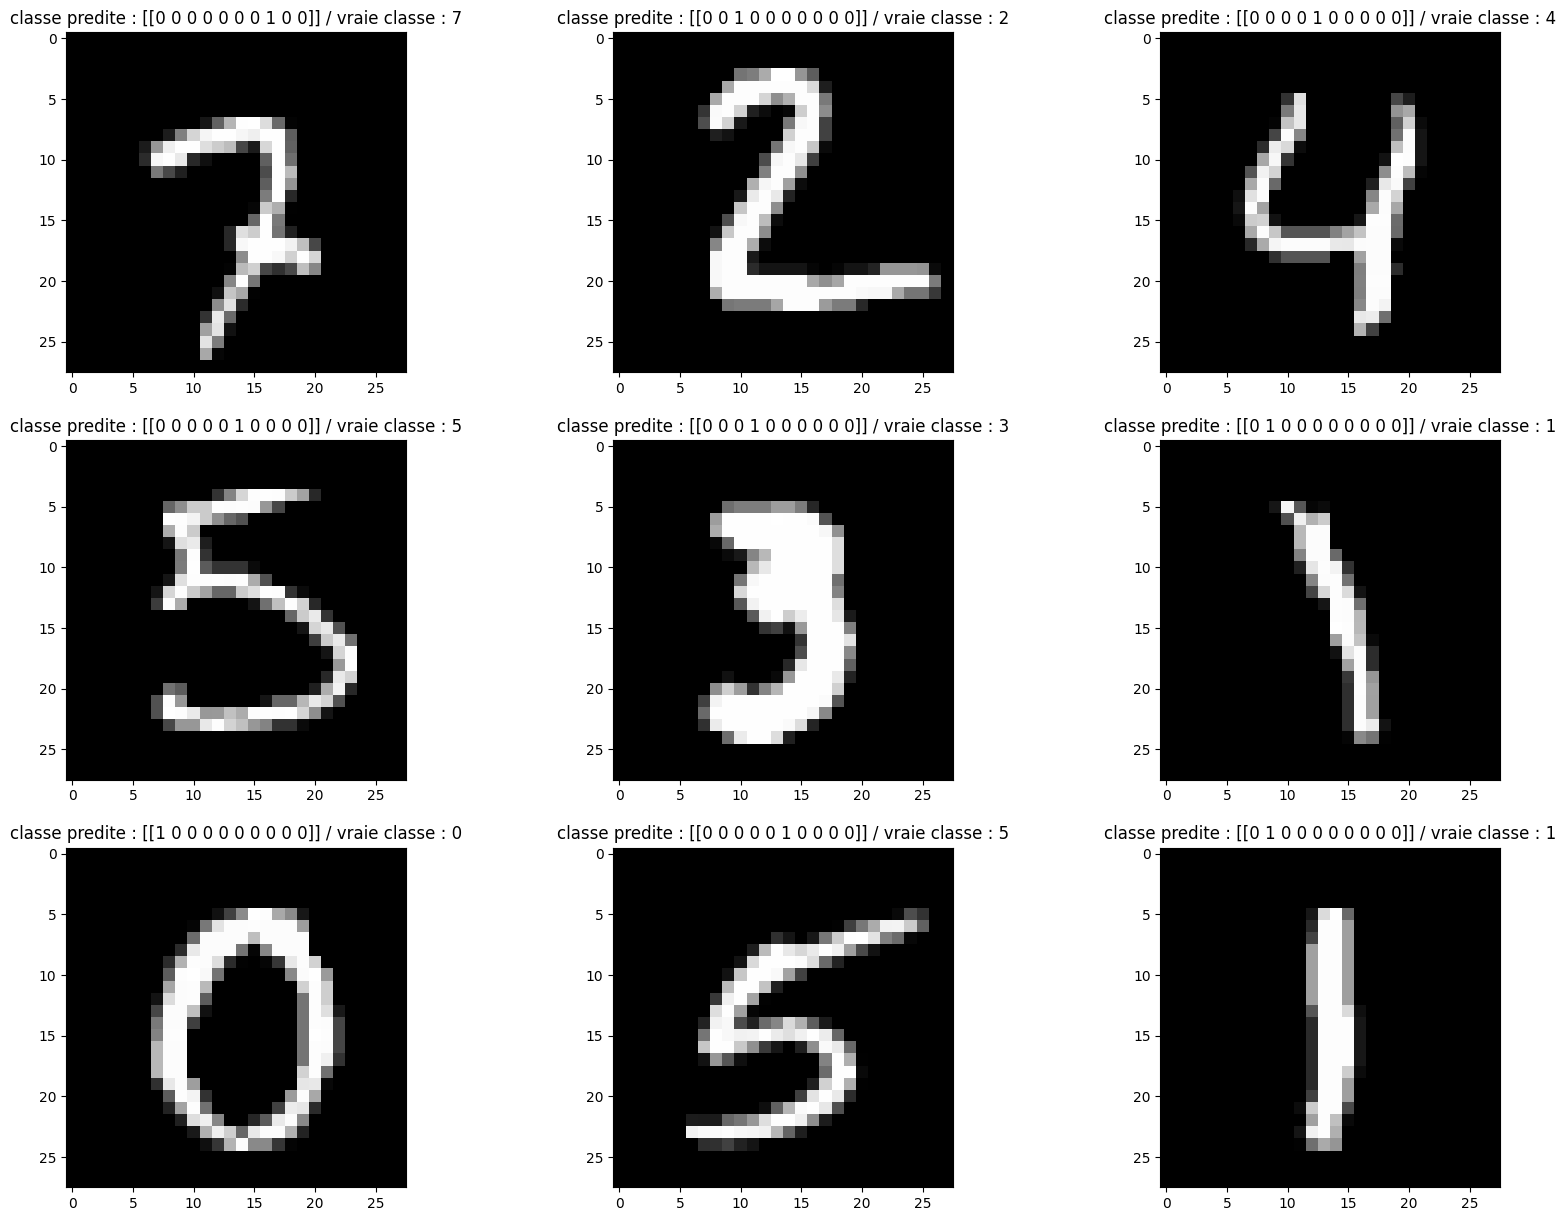

In [10]:
from keras.datasets import mnist
import numpy as np

# Définir une fonction de codage one-hot
def encod_onehot(y):
    onehot = np.zeros((10))
    onehot[y] = 1
    return list(onehot)

# Définir une fonction de division des ensembles d'entraînement et de test
def my_train_test_split(n_train, n_test):
    d = 784
    trs = 60000
    trt = 10000

    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.reshape(trs, d)
    X_test = X_test.reshape(trt, d)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    X_train = X_train[:n_train]
    y_train = y_train[:n_train]
    X_test = X_test[:n_test]
    y_test = y_test[:n_test]
    return X_train, y_train, X_test, y_test

# Charger et prétraiter les données
X_train, y_train, X_test, y_test = my_train_test_split(5000, 100)
y_train = np.asarray([encod_onehot(x) for x in y_train])

# Définir une fonction de prédiction
def pred(x):
    return np.argmax(x, axis=1)

# Définir la structure du réseau de neurones
couche_lin = Linear(X_train.shape[1], 128)
couche_lin2 = Linear(128, 64)
couche_lin3 = Linear(64, 10)
softmax = Softmax()
tan = TanH()
loss = CELogSoftmax()

net = Sequential([couche_lin, tan, couche_lin2, tan, couche_lin3, softmax])

# Définir l'optimiseur
modele = Optim(net, loss, eps=1e-2)

# Entraîner le modèle
modele.SGD(X_train, y_train, test_train_split=False, batch_size=10, epochs=50)

# Utiliser le modèle entraîné pour prédire les résultats sur l'ensemble d'entraînement
y_train_pred = modele.net.predict(X_train)
y_train_pred = pred(y_train_pred)

# Calculer la précision sur l'ensemble d'entraînement
train_accuracy = np.mean(y_train_pred == np.argmax(y_train, axis=1))
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.4f}")

# Utiliser le modèle entraîné pour prédire les résultats sur l'ensemble de test
y_test_pred = modele.net.predict(X_test)
y_test_pred = pred(y_test_pred)

# Calculer la précision sur l'ensemble de test
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

# Visualiser les résultats du test
plot_img(X_test, y_test, modele.net, 9, n=28)
